# 0- Import libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# 1- Prepare dataset

# 1.0 Download the dataset

In [ ]:
#https://drive.google.com/file/d/17BhU6OAjA8E51qusY0WSDWhaX8MnwOOx/view?usp=sharing
!rm -f adult.zip
!gdown 17BhU6OAjA8E51qusY0WSDWhaX8MnwOOx
!rm -f adult.csv
!unzip adult.zip

Downloading...
From: https://drive.google.com/uc?id=17BhU6OAjA8E51qusY0WSDWhaX8MnwOOx
To: /content/adult.zip
100% 668k/668k [00:00<00:00, 126MB/s]
Archive:  adult.zip
  inflating: adult.csv               


## 1.1 - Load dataset

In [ ]:
adult = pd.read_csv('./adult.csv')
adult.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## 1.2- Explore the dataset

### 1.2.1 - Show basic information

In [ ]:
adult.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
33726,44,Private,317535,1st-4th,2,Married-civ-spouse,Protective-serv,Other-relative,White,Male,0,0,40,Mexico,<=50K
37696,35,Self-emp-not-inc,199753,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,<=50K
48036,35,Private,129305,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
13752,53,Private,227475,Bachelors,13,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
5822,22,Private,81145,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [ ]:
adult.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

<Axes: >

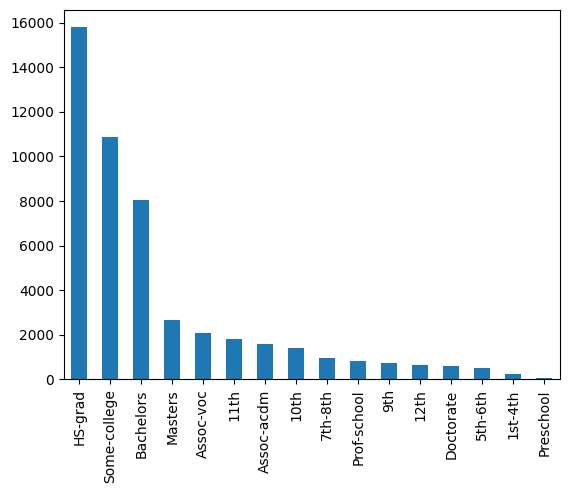

In [ ]:
adult.education.value_counts().plot(kind='bar')

<Axes: >

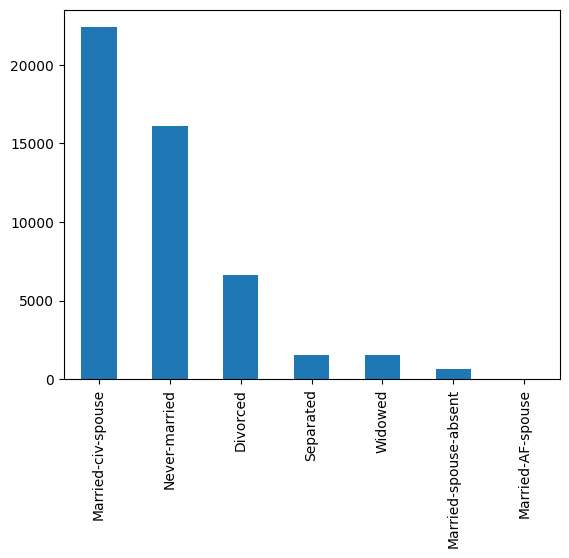

In [ ]:
adult['marital-status'].value_counts().plot(kind='bar')

In [ ]:
adult.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

### Sec: comments

The output given above shows that:
1. .....
2. ....


In [ ]:
# Show missing on occupation
adult[adult.occupation == '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
adult.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

### 1.2.2- Viz the dataset *** UPDATE TO ADULT DATASET***

#### 1.2.2.1 Boxplot (if need)

In [ ]:
D = len(feature_names)
plt.figure(figsize=(6,D*4))
for idx, col in enumerate(feature_names):
  plt.subplot(D,1,idx+1)
  sns.boxplot(data=df, x=col, y='target')
plt.show()

NameError: ignored

#### 1.2.2.2 Violinplot (if need)

In [ ]:
D = len(feature_names)
plt.figure(figsize=(6,D*4))
for idx, col in enumerate(feature_names):
  plt.subplot(D,1,idx+1)
  sns.violinplot(data=df, x=col, y='target')
plt.show()

#### 1.2.2.3 Pairplot (if need)

In [ ]:
"""
g = sns.PairGrid(X)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=1, legend=True)
"""

## 1.3 - Data encoding

In [ ]:
# List all columns with object type
obj_cols = list(filter(lambda c: adult[c].dtype=='object', list(adult.columns)))
obj_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [ ]:
wanted_cols = obj_cols

In [ ]:
import sklearn.preprocessing as pre
table = adult.copy()

#Create mapping from colname 2 encoder
encoders = [pre.LabelEncoder()]*len(wanted_cols)
colname2encoder = dict(zip(wanted_cols, encoders))
print(colname2encoder)

"""
# Train the encoders
for colname in colname2encoder.keys():
  colname2encoder[colname].fit(table[colname])
"""

# Transform columns
for colname in colname2encoder.keys():
  table[colname] = colname2encoder[colname].fit_transform(table[colname])

table


{'workclass': LabelEncoder(), 'education': LabelEncoder(), 'marital-status': LabelEncoder(), 'occupation': LabelEncoder(), 'relationship': LabelEncoder(), 'race': LabelEncoder(), 'gender': LabelEncoder(), 'native-country': LabelEncoder(), 'income': LabelEncoder()}


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [ ]:
table.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48160,27,4,103634,11,9,0,1,1,4,1,0,0,38,39,0
12136,46,4,67001,10,16,2,10,0,4,1,0,0,40,39,1
7701,17,4,201412,0,6,4,5,3,4,1,594,0,5,39,0
25366,32,4,73585,8,11,2,3,0,4,1,0,0,40,39,0
8319,44,4,107433,15,10,2,12,0,4,1,0,0,55,39,1
31875,34,4,202822,12,14,4,13,4,2,0,0,0,40,0,0
10138,54,4,548361,15,10,2,12,0,4,1,0,0,98,39,0
20374,31,2,190401,12,14,2,10,0,4,1,0,0,40,39,0
25097,35,4,186934,11,9,2,4,0,4,1,7688,0,50,39,1
33452,18,4,99219,1,7,4,12,3,4,0,0,0,15,39,0


In [ ]:
adult.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
table.education.value_counts()

11    15784
15    10878
9      8025
12     2657
8      2061
1      1812
7      1601
0      1389
5       955
14      834
6       756
2       657
10      594
4       509
3       247
13       83
Name: education, dtype: int64

In [ ]:
import sklearn.preprocessing as pre
adult.occupation = pre.LabelEncoder().fit_transform(adult.occupation)

In [ ]:
adult.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
17688,39,Local-gov,352628,Assoc-acdm,12,Married-civ-spouse,3,Wife,White,Female,0,0,50,United-States,>50K
4488,49,Local-gov,204377,11th,7,Divorced,8,Own-child,White,Female,0,0,60,United-States,<=50K
24179,33,Private,309630,HS-grad,9,Married-civ-spouse,8,Husband,White,Male,0,0,40,United-States,<=50K
42940,20,Private,166527,Some-college,10,Never-married,1,Own-child,Other,Female,0,0,20,United-States,<=50K
21002,60,?,204486,Bachelors,13,Married-civ-spouse,0,Husband,White,Male,0,0,8,United-States,>50K
21078,46,Self-emp-inc,120121,Bachelors,13,Married-civ-spouse,12,Husband,White,Male,0,0,50,United-States,>50K
28976,22,State-gov,156773,Some-college,10,Never-married,10,Not-in-family,White,Male,0,0,15,?,<=50K
22466,33,Private,176711,Assoc-acdm,12,Never-married,1,Not-in-family,White,Male,0,0,50,United-States,<=50K
21835,58,Private,127264,10th,6,Married-civ-spouse,3,Husband,White,Male,0,0,50,United-States,<=50K
45608,38,Self-emp-inc,176357,HS-grad,9,Married-civ-spouse,4,Husband,White,Male,0,0,50,United-States,<=50K


In [ ]:
y = table['income'].copy()
X = table.drop('income', axis=1)

## 1.4- Split into train/test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)

X_train.shape:  (39073, 14)
X_test.shape:  (9769, 14)


# 2- Create and train machine learning models

## 2.1 - Import and define funtions

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.decomposition import PCA


def generate_pipes(pipe_config):
  pipe_config = [list(step.items()) for _, step in pipe_config]
  pipe_config = list(itertools.product(*pipe_config))
  pipe_names = list(map(lambda steps: [name for name,_ in steps], pipe_config))
  pipe_names = list(map(lambda L: ">".join(L), pipe_names))
  pipes = [Pipeline(cfg) for cfg in pipe_config]
  return dict(zip(pipe_names, pipes))

def find_hyperparams(pipe_mapper):
  print("Start the tunning process ...")
  best_pipes = {}
  results = []
  for idx, pipe_name in enumerate(list(pipe_mapper.keys())):
    print(f"{idx + 1}. Tuning pipe: {pipe_name}")

    # Select parameters related to the current pipeline:
    param_grid = {}
    for step_name in pipe_name.split('>'):
      for param_name in parameters.keys():
        if param_name.startswith(step_name):
          param_grid[param_name] = parameters[param_name]

    # Create a finder and search for the best parameters
    pipe = pipe_mapper[pipe_name]
    finder = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                          scoring= "accuracy",
                          refit= True)

    finder.fit(X_train, y_train)
    print("\t best-params: {:>15s}".format(str(finder.best_params_)))
    print(f"\t best-score (accuracy): {finder.best_score_:15.2f}")
    print()

    # Store best pipe
    best_pipes[pipe_name] = finder.best_estimator_

    # Add results to a dataframe
    rs_item = {"Method": pipe_name, "Accuracy": finder.best_score_}
    for key, value in finder.best_params_.items():
      rs_item[key] = value
    results.append(rs_item)

  print("The tunning is done!")
  tuned_table = pd.DataFrame(results)
  tuned_table.set_index('Method')
  return tuned_table, best_pipes


## 2.2- Define pipeplines

In [ ]:
# Define methods for scaling features
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "StandardScaler": StandardScaler()
}
reducers = {
    'PCA': PCA()
}

# Define methods for classifying samples
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=3000),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "SVC": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

pipe_steps = [
    ('scaler', scalers),
    ('reducers', reducers),
    ('classifier', classifiers)
]

# Define parameters for each method
parameters = {
    "MinMaxScaler__feature_range": [(0, 1), (-1, 1)],
    "StandardScaler__with_mean": [True, False],
    "StandardScaler__with_std": [True, False],
    "SVC__kernel": ['rbf', 'linear'],
    "MLPClassifier__hidden_layer_sizes": [(50,), (100,)],
    "MLPClassifier__activation": ['relu'],
    "DecisionTreeClassifier__criterion": ['entropy'],
    "RandomForestClassifier__n_estimators": [50, 100],
    "RandomForestClassifier__criterion": ['entropy'],
    "PCA__n_components": [0.90, 0.95]
}


## 2.3- Tune hyper-parameters

In [ ]:
pipe_mapper = generate_pipes(pipe_steps)
tuned_table, best_pipes = find_hyperparams(pipe_mapper)

Start the tunning process ...
1. Tuning pipe: MinMaxScaler>PCA>LogisticRegression
	 best-params: {'MinMaxScaler__feature_range': (-1, 1), 'PCA__n_components': 0.95}
	 best-score (accuracy):            0.81

2. Tuning pipe: MinMaxScaler>PCA>MLPClassifier
	 best-params: {'MLPClassifier__activation': 'relu', 'MLPClassifier__hidden_layer_sizes': (100,), 'MinMaxScaler__feature_range': (-1, 1), 'PCA__n_components': 0.95}
	 best-score (accuracy):            0.84

3. Tuning pipe: MinMaxScaler>PCA>SVC
	 best-params: {'MinMaxScaler__feature_range': (0, 1), 'PCA__n_components': 0.95, 'SVC__kernel': 'rbf'}
	 best-score (accuracy):            0.82

4. Tuning pipe: MinMaxScaler>PCA>DecisionTreeClassifier
	 best-params: {'DecisionTreeClassifier__criterion': 'entropy', 'MinMaxScaler__feature_range': (-1, 1), 'PCA__n_components': 0.95}
	 best-score (accuracy):            0.78

5. Tuning pipe: MinMaxScaler>PCA>RandomForestClassifier


In [ ]:
# Save to file
tuned_table.to_csv("tuned_results.csv", sep=";")

In [ ]:
# Best pipeline:
tuned_table[tuned_table["Accuracy"] == tuned_table["Accuracy"].max()].dropna(axis=1)

In [ ]:
# Show the selected pipe
selected_pipe_name = tuned_table.Method[tuned_table["Accuracy"].argmax()]
print(f"Name of the best pipe: {selected_pipe_name}")
selected_pipe = best_pipes[selected_pipe_name]


# 3- Evaluate and improve the models

In [ ]:
from sklearn.metrics import classification_report

print("Start the evaluation process ...")
y_pred = selected_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print("The evaluation is done!")

# 4- Deploy the models

## 4.1- Store the best pipeline to file

In [ ]:
import pickle
# save to file
file = open('best_pipe.bin', 'wb')
pickle.dump(selected_pipe, file)

## 4.2- Load and use the pipeline

In [ ]:
file = open('best_pipe.bin', 'rb')
predictor = pickle.load(file)

# Example of using the pipeline
print("Here is an example of using 'predictor'")
y_pred = predictor.predict(X_test)
print(classification_report(y_test, y_pred))
print("Example: done!")